In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as lenc
from sklearn.metrics import plot_confusion_matrix as pltconf
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.model_selection import train_test_split as trn
from sklearn.metrics import accuracy_score as acc

from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as logreg

In [92]:
train_df = pd.read_csv("./datasets/titanic_train.csv")
test_df = pd.read_csv("./datasets/titanic_test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [94]:
traindf = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']].copy()
testdf = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']].copy()
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [95]:
traindf['cabinornot'] = traindf['Cabin'].notnull().astype('str')
testdf['cabinornot'] = testdf['Cabin'].notnull().astype('str')
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabinornot
0,0,3,male,22.0,1,0,7.2500,NaN,S,False
1,1,1,female,38.0,1,0,71.2833,C85,C,True
2,1,3,female,26.0,0,0,7.9250,NaN,S,False
3,1,1,female,35.0,1,0,53.1000,C123,S,True
4,0,3,male,35.0,0,0,8.0500,NaN,S,False


In [96]:
age_arr = np.array(traindf.Age)
age_avg = np.mean(np.nan_to_num(age_arr))
age_avg = round(age_avg, 1)
age_avg

23.8

In [97]:
fare_arr = np.array(testdf.Fare)
fare_avg = np.mean(np.nan_to_num(fare_arr))
fare_avg = round(fare_avg, 1)
fare_avg

35.5

In [98]:
traindf['Cabin'] = traindf['Cabin'].replace(np.nan, 0)
traindf['Age'] = traindf['Age'].replace(np.nan, age_avg)

testdf['Cabin'] = testdf['Cabin'].replace(np.nan, 'none')
testdf['Age'] = testdf['Age'].replace(np.nan, age_avg)
testdf['Fare'] = testdf['Fare'].replace(np.nan, fare_avg)

print(traindf.info())
print("-" * 50)
print(testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       891 non-null    object 
 8   Embarked    889 non-null    object 
 9   cabinornot  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age        

In [99]:
traindf = traindf.drop('Cabin', axis = 'columns')
testdf = testdf.drop('Cabin', axis = 'columns')

In [100]:
traindf = traindf.dropna()

print(traindf.info())
print("-" * 50)
print(testdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked    889 non-null    object 
 8   cabinornot  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    float64
 3   SibSp       

In [101]:
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabinornot
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,True
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,True
4,0,3,male,35.0,0,0,8.0500,S,False


In [102]:
bins = [0, 5, 12, 18, 24, 35, 55, 65, np.inf]
groups = ['baby','child','teen','student','young adult','middle aged','old','oldold']
traindf['agegroup'] = pd.cut(traindf['Age'], bins, labels = groups)
testdf['agegroup'] = pd.cut(testdf['Age'], bins, labels = groups)

In [103]:
traindf = traindf.drop('Age', axis = "columns")
testdf = testdf.drop('Age', axis = "columns")

In [104]:
le1 = lenc()
le2 = lenc()
to_convert = ['Sex', 'Embarked', 'cabinornot','agegroup']
for var2 in to_convert :
    labels1 = le1.fit_transform(traindf[var2])
    labels2 = le2.fit_transform(testdf[var2])
    traindf = traindf.drop(var2, axis = 'columns')
    testdf = testdf.drop(var2, axis = 'columns')
    traindf[var2] = labels1
    testdf[var2] = labels2

In [105]:
traindf.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex,Embarked,cabinornot,agegroup
0,0,3,1,0,7.2500,1,2,0,5
1,1,1,1,0,71.2833,0,0,1,2
2,1,3,0,0,7.9250,0,2,0,7
3,1,1,1,0,53.1000,0,2,1,7
4,0,3,0,0,8.0500,1,2,0,7


In [106]:
testdf.head()

,Pclass,SibSp,Parch,Fare,Sex,Embarked,cabinornot,agegroup
0,3,0,0,7.8292,1,1,0,7
1,3,1,0,7.0000,0,2,0,2
2,2,0,0,9.6875,1,1,0,3
3,3,0,0,8.6625,1,2,0,7
4,3,1,1,12.2875,0,2,0,5


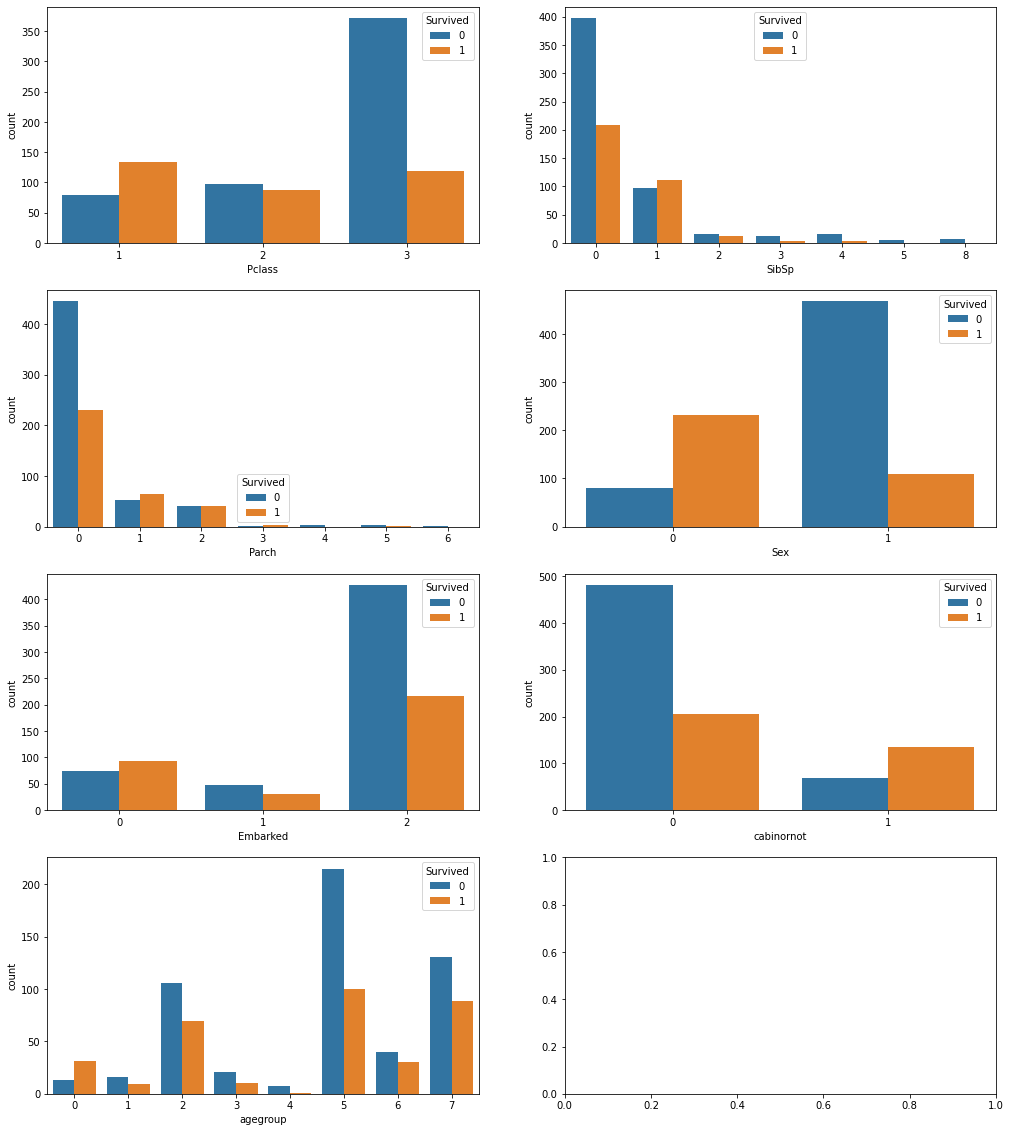

In [107]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (17,20))
ax = ax.reshape(8)

to_plot = ['Pclass','SibSp','Parch','Sex','Embarked','cabinornot','agegroup']
counter = 0
for axes in ax:
    
    if counter != 7 :
        sns.countplot(x = to_plot[counter], hue = 'Survived', data = traindf, ax = axes)
        counter = counter + 1

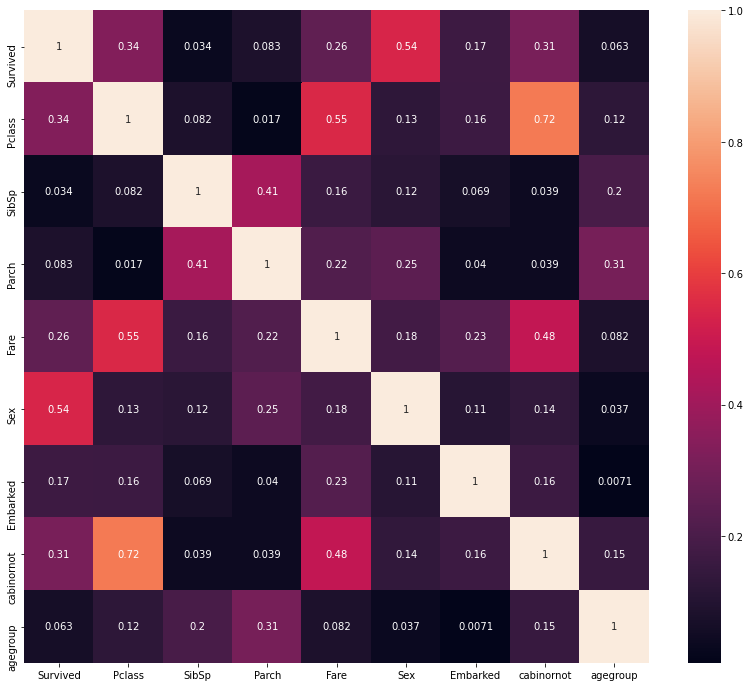

In [108]:
matrix = traindf.corr().abs()

plt.figure(figsize = (14,12))
sns.heatmap(matrix, annot = True)
plt.show()

In [109]:
#traindf = traindf.drop(['Pclass','Embarked'], axis = 'columns')
#testdf = testdf.drop(['Pclass','Embarked'], axis = 'columns')

In [110]:
traindf.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex,Embarked,cabinornot,agegroup
0,0,3,1,0,7.2500,1,2,0,5
1,1,1,1,0,71.2833,0,0,1,2
2,1,3,0,0,7.9250,0,2,0,7
3,1,1,1,0,53.1000,0,2,1,7
4,0,3,0,0,8.0500,1,2,0,7


In [111]:
xvals = np.array(traindf[['SibSp', 'Sex', 'cabinornot', 'agegroup']], ndmin = 2)
yvals = np.array(traindf['Survived'])
print(xvals.shape, yvals.shape)

(889, 4) (889,)


In [112]:
train_x, test_x, train_y, test_y = trn(xvals, yvals, test_size = 0.2, random_state = 0)

In [113]:
algo = ['SVM', 'Naive Bayes', 'KNN', 'Decision trees', 'Random Forest', 'Logistic Regression']
accuracy = []

In [114]:
svm_model = SVC(kernel = 'rbf')
svm_model.fit(train_x, train_y)
svm_acc = acc(test_y, svm_model.predict(test_x))
print("Accuracy : ", svm_acc)

accuracy.append(svm_acc)

Accuracy :  0.7359550561797753


In [115]:
nb_model = nb()
nb_model.fit(train_x, train_y)
nb_acc = acc(test_y, nb_model.predict(test_x))
print("Accuracy : ", nb_acc)

accuracy.append(nb_acc)

Accuracy :  0.7415730337078652


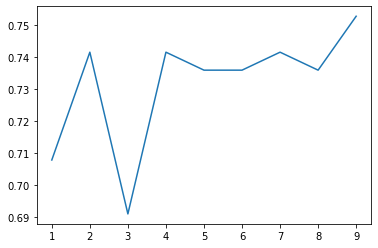

Highest accuracy with :  9


In [116]:
temparr1 = []
ks = 10

for var3 in range(1,ks):
    trial_model = kNN(n_neighbors = var3)
    trial_model.fit(train_x, train_y)
    temparr1.append(acc(test_y, trial_model.predict(test_x)))
    
temparr1 = np.array(temparr1)
plt.plot(range(1,ks),temparr1)
plt.show()

ideal = temparr1.argmax() + 1
print("Highest accuracy with : ", ideal)

In [117]:
knn_model = kNN(n_neighbors = ideal)
knn_model.fit(train_x, train_y)
knn_acc = acc(test_y, knn_model.predict(test_x))
print("Accuracy : ", knn_acc)

accuracy.append(knn_acc)

Accuracy :  0.7528089887640449


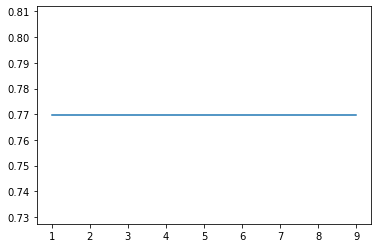

Highest accuracy with :  1


In [118]:
temparr2 = []
depths = 10

for var4 in range(1,depths):
    trial_model2 = dtree(criterion = 'entropy', max_depth = depths)
    trial_model2.fit(train_x, train_y)
    temparr2.append(acc(test_y, trial_model2.predict(test_x)))
    
temparr2 = np.array(temparr2)
plt.plot(range(1,ks),temparr2)
plt.show()

ideal2 = temparr2.argmax() + 1
print("Highest accuracy with : ", ideal2)

In [119]:
dtree_model = dtree(criterion = 'entropy', max_depth = ideal2)
dtree_model.fit(train_x, train_y)
dtree_acc = acc(test_y, dtree_model.predict(test_x))
print("Accuracy : ", dtree_acc)

accuracy.append(dtree_acc)

Accuracy :  0.7191011235955056


In [120]:
rfc_model = rfc()
rfc_model.fit(train_x, train_y)
rfc_acc = acc(test_y, rfc_model.predict(test_x))
print("Accuracy : ", rfc_acc)

accuracy.append(rfc_acc)

Accuracy :  0.7640449438202247


In [121]:
lr_model = logreg()
lr_model.fit(train_x, train_y)
lr_acc = acc(test_y, lr_model.predict(test_x))
print("Accuracy : ", lr_acc)

accuracy.append(lr_acc)

Accuracy :  0.7191011235955056


In [122]:
model_acc = pd.DataFrame({'Model' : algo, 'Accuracy' : accuracy})

model_acc.sort_values('Accuracy', ascending = False)

,Model,Accuracy
4,Random Forest,0.764045
2,KNN,0.752809
1,Naive Bayes,0.741573
0,SVM,0.735955
3,Decision trees,0.719101
5,Logistic Regression,0.719101


In [123]:
testxvals = np.array(testdf[['SibSp', 'Sex', 'cabinornot', 'agegroup']], ndmin = 2)

In [124]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [125]:
df1 = test_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 'columns').copy()
df2 = test_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 'columns').copy()
df3 = test_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 'columns').copy()
df4 = test_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 'columns').copy()
df5 = test_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 'columns').copy()
df6 = test_df.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 'columns').copy()

In [126]:
preds1 = knn_model.predict(testxvals)
df1['Survived'] = preds1

In [127]:
preds2 = nb_model.predict(testxvals)
df2['Survived'] = preds2

In [128]:
preds3 = svm_model.predict(testxvals)
df3['Survived'] = preds3

In [129]:
preds4 = dtree_model.predict(testxvals)
df4['Survived'] = preds4

In [130]:
preds5 = rfc_model.predict(testxvals)
df5['Survived'] = preds5

In [131]:
preds6 = lr_model.predict(testxvals)
df6['Survived'] = preds6

In [132]:
#df1.to_csv('knn_preds', index = False)
#df2.to_csv('nb_preds', index = False)
#df3.to_csv('svm_preds', index = False)
#df4.to_csv('dtree_preds', index = False)
#df5.to_csv('rfc_preds', index = False)
#df6.to_csv('lr_preds', index = False)